### What is the Goal of this Project?
In pursuing the IBM Data Science Professional Certificate offered through Coursera, the Capstone Project required me to come up with a business problem and use FourSquare API and K-means Clustering to solve the problem.

### Business Problem
A small family owned brewery located in the suburbs of Indianapolis, Indiana is considering relocating near Lucas Oil Stadium. With having limited knowledge of the competition with other breweries near Lucas Oil Stadium, the exercises in this project investigates the types of venues and breweries near Lucas Oil Stadium. 

### Data
There are two sources of data used in this project. The first being a government dataset that includes the neighborhoods in Indianapolis along with the latitude and longitude of each neighborhood. This data was used to extract venue information using FourSquare API within a certain radius of each neighborhood. 

Let's get to it!

#### Import Libraries 

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import json
from geopy.geocoders import Nominatim   #convert an address into lat and log values
import requests  #libaray to handle requests
from pandas.io.json import json_normalize    #transfrom JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans    #import k-means from clustering stage
import folium

print('libraries imported')

libraries imported


In [58]:
CLIENT_ID = myID # your Foursquare ID
CLIENT_SECRET = mySecret # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [3]:
#Get geographical coordinates of Indy
latitude = 39.7684
longitude = -86.1581

#### Neighborhood Data of Indianapolis

In [4]:
#import csv file of indy neighborhoods
df = pd.read_csv('/Users/stephaniedudley/Downloads/IN_Neigh_B.csv')


In [59]:
#clean data
df['Neighborhood'] = df['Neighborhood'].map(lambda x: x.strip(', Indiana'))
df.rename(columns ={'Latitutude': 'Latitude'},inplace =True)  

In [60]:
df.head()

,Neighborhood,Latitude,Longitude
0,Delaware Trails,39.880700,-86.182105
1,Devingto,39.834367,-86.075299
2,Sunshine Gardens,39.688101,-86.211099
3,Stout Fiel,39.748306,-86.235409
4,Park Fletcher,39.734973,-86.252495


In [8]:
# create map of Indy using latitude and longitude values
map_indy = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indy)  
    
map_indy

#### Using FourSquare API to get venue information

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [64]:
## Create function to repeat the same process to all the neighborhoods in indy
def getNearbyVenues(names, latitudes, longitudes, radius=1600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        global results
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
#Call function and get information from Foursquare
indy_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Delaware Trails
Devingto
Sunshine Gardens
Stout Fiel
Park Fletcher
West Indianapolis
Near Westside
Southern Dunes
West Newto
Allisonville
Ameriplex
Devonshire
Downtow
Fountain Square
Northwest High School
Meridian Kessler
Nor
Maywoo
Arlington Woods
Augusta / New August
Beech Grove
St Vincent / Greenbriar
Key Meadows
North Perry
Mars Hill
Garfield Park
College Park
Geist
Lawrence
East Warre
Brendonwoo
Broad Ripple
Butler-Tarkington/Rocky Ripple
Forest Manor
Crown Hill
Glendale
Christian Park
Lawrence-Fort Ben-Oaklando
rvingto
Brightwoo
Meadows
Meridian Hills/Williams Creek
Camby
Castleto
Chapel Hill / Ben Davis
Millersville
East Gate
Raymond Park
Southeast Warre
North Central
Mapleto
Near NW - Riverside
Marian - Cold Springs
Guion Creek
Ravenswoo
Keystone at the Crossing
Canterbury-Chatar
ternational Marketplace
Speedway
Garden City
Five Points
Poplar Grove
Wanamaker
Clermont
Traders Point
South Frankl
University Heights
Edgewoo
Crooked Creek
Wynnedale / Spring Hill
Crows Nest
Homecroft

Let's see what the results look like! Four each neighborhood, from FourSquare we extracted the Venue name, location, and the venue category and put into the indy_venues dataframe.

In [70]:
#here are the first 20 results
indy_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Delaware Trails,39.880700,-86.182105,Arthur M. Glick JCC,39.879291,-86.172971,Gym / Fitness Center
1,Delaware Trails,39.880700,-86.182105,Juan Soloman Park,39.867663,-86.188041,Park
2,Delaware Trails,39.880700,-86.182105,Westlane Trails,39.884096,-86.187619,Baseball Field
3,Delaware Trails,39.880700,-86.182105,Bureau of Jewish Education,39.880281,-86.173144,Dance Studio
4,Delaware Trails,39.880700,-86.182105,W 73rd St & Hoover Rd,39.886599,-86.174476,Intersection
5,Delaware Trails,39.880700,-86.182105,Jewish Community Center Softball Fields,39.878500,-86.171403,Baseball Field
6,Delaware Trails,39.880700,-86.182105,Lucky Louie's Sausage & Hot Dogs,39.876928,-86.166332,Food Truck
7,Devingto,39.834367,-86.075299,CVS pharmacy,39.825613,-86.083166,Pharmacy
8,Devingto,39.834367,-86.075299,SUBWAY,39.825257,-86.082262,Sandwich Place
9,Devingto,39.834367,-86.075299,Popeyes Louisiana Kitchen,39.840768,-86.064136,Fried Chicken Joint


### Let's Analyze Neighborhood and Venue Info

In [22]:
indy_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ameriplex,10,10,10,10,10,10
Arlington Woods,30,30,30,30,30,30
Augusta / New August,27,27,27,27,27,27
Beech Grove,34,34,34,34,34,34
Brendonwoo,7,7,7,7,7,7
Brightwoo,12,12,12,12,12,12
Broad Ripple,45,45,45,45,45,45
Butler-Tarkington/Rocky Ripple,25,25,25,25,25,25
Camby,7,7,7,7,7,7


In [71]:
#Finds out how many unique category of venues exist
print('There are {} unique venue categories.'.format(len(indy_venues['Venue Category'].unique())))

There are 287 unique venue categories.


In order to run K-means Clustering on this venue category data, we need to use one hot encoding. One hot encoding is a process that converts categorical features into binary variables - where a value of 1 indicates present, and 0 indicates non-present. This process is necessary for K-means Clustering to work.

In [72]:
# one hot encoding on Venue Category
indy_onehot = pd.get_dummies(indy_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
indy_onehot['Neighborhood'] = indy_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [indy_onehot.columns[-1]] + list(indy_onehot.columns[:-1])
indy_onehot = indy_onehot[fixed_columns]

#first 10 results
indy_onehot.head(10)

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bike Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wing

In [84]:
#lets group rows by neighborhood and by taking the mean of the frequency of occurence of each category
indy_grouped = indy_onehot.groupby('Neighborhood').mean().reset_index()
indy_grouped

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bike Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wing

Let's look at the top categories of venues per neighborhood by frequency

In [85]:
#print out each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in indy_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = indy_grouped[indy_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ameriplex----
                        venue  freq
0                       Hotel   0.4
1         American Restaurant   0.3
2        Gym / Fitness Center   0.1
3              Sandwich Place   0.1
4  Construction & Landscaping   0.1


----Arlington Woods----
                  venue  freq
0  Fast Food Restaurant  0.10
1           Pizza Place  0.07
2    Chinese Restaurant  0.07
3    Seafood Restaurant  0.07
4    Recycling Facility  0.03


----Augusta / New August----
                  venue  freq
0  Fast Food Restaurant  0.11
1        Discount Store  0.11
2           Pizza Place  0.11
3               Dog Run  0.07
4         Grocery Store  0.07


----Beech Grove----
         venue  freq
0         Park  0.12
1  Gas Station  0.09
2         Bank  0.09
3     Pharmacy  0.06
4          Bar  0.06


----Brendonwoo----
         venue  freq
0         Lake  0.29
1         Pool  0.14
2  Art Gallery  0.14
3        Trail  0.14
4  Golf Course  0.14


----Brightwoo----
                    venue  freq
0 

                  venue  freq
0           Pizza Place  0.18
1                  Bank  0.09
2          Optical Shop  0.09
3  Fast Food Restaurant  0.09
4           Gas Station  0.09


----Meadows----
                  venue  freq
0   Rental Car Location  0.09
1  Fast Food Restaurant  0.06
2              Pharmacy  0.06
3             BBQ Joint  0.06
4        Discount Store  0.06


----Meridian Hills/Williams Creek----
                   venue  freq
0           Intersection  0.14
1                    Gym  0.14
2  Performing Arts Venue  0.14
3         Scenic Lookout  0.14
4   Fast Food Restaurant  0.14


----Meridian Kessler----
                venue  freq
0                 Gym  0.05
1                 Pub  0.05
2         Coffee Shop  0.05
3         Pizza Place  0.05
4  Italian Restaurant  0.05


----Millersville----
                  venue  freq
0  Fast Food Restaurant  0.18
1           Gas Station  0.14
2        Discount Store  0.07
3              Pharmacy  0.07
4   Fried Chicken Joint  0.0

In [86]:
#Let's put into Pandas df
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
#create new df and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = indy_grouped['Neighborhood']

for ind in np.arange(indy_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(indy_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ameriplex,Hotel,American Restaurant,Gym / Fitness Center,Sandwich Place,Construction & Landscaping,Flower Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,Arlington Woods,Fast Food Restaurant,Seafood Restaurant,Pizza Place,Chinese Restaurant,Recycling Facility,Nightclub,Office,Furniture / Home Store,Bowling Alley,Bank
2,Augusta / New August,Pizza Place,Discount Store,Fast Food Restaurant,Grocery Store,Dog Run,Bank,Sandwich Place,Mexican Restaurant,Caribbean Restaurant,Baseball Field
3,Beech Grove,Park,Gas Station,Bank,Pharmacy,Bar,Fast Food Restaurant,Music Store,Speakeasy,Bowling Alley,Breakfast Spot
4,Brendonwoo,Lake,Pool,American Restaurant,Art Gallery,Trail,Golf Course,Flea Market,Farm,Farmers Market,Fast Food Restaurant


### Kmeans Clustering Method

In [88]:
#What data are we using in K-means clustering?
print("We will use {} neighborhoods in the K-means Clustering".format(indy_grouped.shape[0]))
print("We will use {} venue categories in the K-means Clustering".format(indy_grouped.shape[1]-1))

We will use 76 neighborhoods in the K-means Clustering
We will use 287 venue categories in the K-means Clustering


In [89]:
# set number of clusters
kclusters = 7

indy_grouped_clustering = indy_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(indy_grouped_clustering)

# check cluster labels generated for each row in the dataframe to make sure it matches the # of neighborhoods
print("There were {} cluster labels generated".format(len(kmeans.labels_)))

There were 76 cluster labels generated


In [90]:
#create new df that includes cluster as well as th top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

indy_merged = df

# merge indy_grouped with indy_data to add latitude/longitude for each neighborhood
indy_merged = indy_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

indy_merged.head(10) # check the first columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Delaware Trails,39.880700,-86.182105,6.0,Baseball Field,Dance Studio,Park,Food Truck,Gym / Fitness Center,Intersection,Disc Golf,Discount Store,French Restaurant,Fountain
1,Devingto,39.834367,-86.075299,4.0,Fried Chicken Joint,Cosmetics Shop,Seafood Restaurant,Park,Liquor Store,Pharmacy,Chinese Restaurant,Fish & Chips Shop,Gas Station,Shopping Mall
2,Sunshine Gardens,39.688101,-86.211099,2.0,Scenic Lookout,Furniture / Home Store,American Restaurant,Harbor / Marina,Food,Fountain,Football Stadium,Food Truck,Food Court,Food & Drink Shop
3,Stout Fiel,39.748306,-86.235409,0.0,Fast Food Restaurant,Pizza Place,Discount Store,Mexican Restaurant,Auto Workshop,Fried Chicken Joint,Motorcycle Shop,Pharmacy,Men's Store,Storage Facility
4,Park Fletcher,39.734973,-86.252495,5.0,Hotel,American Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Theater,Gym,Food,Liquor Store,Gas Station
5,West Indianapolis,39.775092,-86.132160,3.0,Brewery,Bar,Coffee Shop,Mexican Restaurant,American Restaurant,Gastropub,Pizza Place,Pub,Park,Mediterranean Restaurant
6,Near Westside,39.779312,-86.213439,0.0,Fast Food Restaurant,Fried Chicken Joint,Gas Station,Discount Store,Pawn Shop,History Museum,Convenience Store,Rental Car Location,Furniture / Home Store,Shopping Mall
7,Southern Dunes,39.657838,-86.215968,4.0,Liquor Store,Discount Store,Gym,Golf Course,Chinese Restaurant,Home Service,Pool,Sports Club,Cosmetics Shop,Food & Drink Shop
8,West Newto,39.653100,-86.282770,4.0,Farm,Moving Target,Sandwich Place,Market,Historic Site,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
9,Allisonville,39.905665,86.079608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#clean data: drop nan, rename columns, set index
indy_merged.dropna(inplace=True)
indy_merged.rename(columns = {'Cluster Labels':'clusterlabels'},inplace = True)
indy_merged.set_index("Neighborhood", inplace = True)

In [106]:
#Found error, need to change West Indianapolis neighborhood to Near Eastside
indy_merged=indy_merged.rename(index={'West Indianapolis': 'Near Eastside'})

In [107]:
indy_merged.head(5)

,Neighborhood,Latitude,Longitude,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Delaware Trails,39.880700,-86.182105,6,Baseball Field,Dance Studio,Park,Food Truck,Gym / Fitness Center,Intersection,Disc Golf,Discount Store,French Restaurant,Fountain
1,Devingto,39.834367,-86.075299,4,Fried Chicken Joint,Cosmetics Shop,Seafood Restaurant,Park,Liquor Store,Pharmacy,Chinese Restaurant,Fish & Chips Shop,Gas Station,Shopping Mall
2,Sunshine Gardens,39.688101,-86.211099,2,Scenic Lookout,Furniture / Home Store,American Restaurant,Harbor / Marina,Food,Fountain,Football Stadium,Food Truck,Food Court,Food & Drink Shop
3,Stout Fiel,39.748306,-86.235409,0,Fast Food Restaurant,Pizza Place,Discount Store,Mexican Restaurant,Auto Workshop,Fried Chicken Joint,Motorcycle Shop,Pharmacy,Men's Store,Storage Facility
4,Park Fletcher,39.734973,-86.252495,5,Hotel,American Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Theater,Gym,Food,Liquor Store,Gas Station


In [96]:
indy_merged=indy_merged.reset_index()

In [108]:
#change cluster labels from float to int
indy_merged['clusterlabels'] = indy_merged['clusterlabels'].astype(int)

In [109]:
indy_merged

,Neighborhood,Latitude,Longitude,clusterlabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Delaware Trails,39.880700,-86.182105,6,Baseball Field,Dance Studio,Park,Food Truck,Gym / Fitness Center,Intersection,Disc Golf,Discount Store,French Restaurant,Fountain
1,Devingto,39.834367,-86.075299,4,Fried Chicken Joint,Cosmetics Shop,Seafood Restaurant,Park,Liquor Store,Pharmacy,Chinese Restaurant,Fish & Chips Shop,Gas Station,Shopping Mall
2,Sunshine Gardens,39.688101,-86.211099,2,Scenic Lookout,Furniture / Home Store,American Restaurant,Harbor / Marina,Food,Fountain,Football Stadium,Food Truck,Food Court,Food & Drink Shop
3,Stout Fiel,39.748306,-86.235409,0,Fast Food Restaurant,Pizza Place,Discount Store,Mexican Restaurant,Auto Workshop,Fried Chicken Joint,Motorcycle Shop,Pharmacy,Men's Store,Storage Facility
4,Park Fletcher,39.734973,-86.252495,5,Hotel,American Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Theater,Gym,Food,Liquor Store,Gas Station
5,Near Eastside,39.775092,-86.132160,3,Brewery,Bar,Coffee Shop,Mexican Restaurant,American Restaurant,Gastropub,Pizza Place,Pub,Park,Mediterranean Restaurant
6,Near Westside,39.779312,-86.213439,0,Fast Food Restaurant,Fried Chicken Joint,Gas Station,Discount Store,Pawn Shop,History Museum,Convenience Store,Rental Car Location,Furniture / Home Store,Shopping Mall
7,Southern Dunes,39.657838,-86.215968,4,Liquor Store,Discount Store,Gym,Golf Course,Chinese Restaurant,Home Service,Pool,Sports Club,Cosmetics Shop,Food & Drink Shop
8,West Newto,39.653100,-86.282770,4,Farm,Moving Target,Sandwich Place,Market,Historic Site,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
9,Ameriplex,39.677300,-86.314908,5,Hotel,American Restaurant,Gym / Fitness Center,Sandwich Place,Construction & Landscaping,Flower Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


### Results and Analysis

**How many neighborhoods are in each cluster?**

In [43]:
indy_merged.clusterlabels.value_counts()

3    44
0    16
4    10
5     3
6     1
2     1
1     1
Name: clusterlabels, dtype: int64

In [110]:
#VISUALIZE CLUSTERS!
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
colorrange = ['red', 'blue', 'green', 'purple', 'orange', 'gray','lightgreen']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(indy_merged['Latitude'], indy_merged['Longitude'], indy_merged['Neighborhood'], indy_merged['clusterlabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colorrange[cluster],
        fill=True,
        fill_color=colorrange[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Let's look at the venue information for the top 3 clusters (3, 0, and 4 respectively)**

In [111]:
#Cluster 0
indy_merged.loc[indy_merged['clusterlabels'] == 0, indy_merged.columns[[1] + list(range(4, indy_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,39.748306,Fast Food Restaurant,Pizza Place,Discount Store,Mexican Restaurant,Auto Workshop,Fried Chicken Joint,Motorcycle Shop,Pharmacy,Men's Store,Storage Facility
6,39.779312,Fast Food Restaurant,Fried Chicken Joint,Gas Station,Discount Store,Pawn Shop,History Museum,Convenience Store,Rental Car Location,Furniture / Home Store,Shopping Mall
10,39.838896,Fast Food Restaurant,Gas Station,Pharmacy,Discount Store,Cosmetics Shop,Fried Chicken Joint,Breakfast Spot,Bank,Donut Shop,Other Repair Shop
16,39.726155,Pizza Place,Chinese Restaurant,Diner,Bank,Discount Store,Optical Shop,Gas Station,Gym,Liquor Store,Fast Food Restaurant
18,39.890438,Pizza Place,Discount Store,Fast Food Restaurant,Grocery Store,Dog Run,Bank,Sandwich Place,Mexican Restaurant,Caribbean Restaurant,Baseball Field
23,39.709359,Pizza Place,Pharmacy,Fast Food Restaurant,Liquor Store,Mexican Restaurant,Discount Store,Gym / Fitness Center,Gas Station,Supermarket,Chinese Restaurant
26,39.929950,Gym,Spa,Pizza Place,Pilates Studio,American Restaurant,Pharmacy,Furniture / Home Store,Fast Food Restaurant,Flower Shop,Farm
35,39.762165,Fast Food Restaurant,Discount Store,Pharmacy,Park,Gas Station,Chinese Restaurant,Light Rail Station,Sandwich Place,Liquor Store,Supermarket
38,39.801037,Park,Thrift / Vintage Store,Kitchen Supply Store,Gas Station,Fast Food Restaurant,Office,Gym,Fried Chicken Joint,Discount Store,Dive Bar
40,39.898717,Gym,Southern / Soul Food Restaurant,Intersection,Diner,Scenic Lookout,Performing Arts Venue,Fast Food Restaurant,Flea Market,Falafel Restaurant,Farm


In [112]:
#Cluster 3
indy_merged.loc[indy_merged['clusterlabels'] == 3, indy_merged.columns[[0] + list(range(4, indy_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Near Eastside,Brewery,Bar,Coffee Shop,Mexican Restaurant,American Restaurant,Gastropub,Pizza Place,Pub,Park,Mediterranean Restaurant
11,Downtow,Bar,Hotel,Steakhouse,American Restaurant,Burger Joint,Mexican Restaurant,Pizza Place,Breakfast Spot,Sandwich Place,Spa
12,Fountain Square,Bar,Brewery,Gas Station,Discount Store,Mexican Restaurant,American Restaurant,Sandwich Place,Music Venue,Gaming Cafe,Coffee Shop
13,Northwest High School,Pizza Place,Discount Store,Mexican Restaurant,American Restaurant,Fast Food Restaurant,Gym / Fitness Center,Pharmacy,Chinese Restaurant,Sandwich Place,Gas Station
14,Meridian Kessler,Pub,Pizza Place,Coffee Shop,Italian Restaurant,Gym,Ice Cream Shop,Deli / Bodega,Breakfast Spot,Trail,American Restaurant
15,Nor,Hotel,Pizza Place,Intersection,Restaurant,Gym,Business Service,Brewery,Mediterranean Restaurant,Medical Center,Gas Station
17,Arlington Woods,Fast Food Restaurant,Seafood Restaurant,Pizza Place,Chinese Restaurant,Recycling Facility,Nightclub,Office,Furniture / Home Store,Bowling Alley,Bank
19,Beech Grove,Park,Gas Station,Bank,Pharmacy,Bar,Fast Food Restaurant,Music Store,Speakeasy,Bowling Alley,Breakfast Spot
20,St Vincent / Greenbriar,American Restaurant,Pizza Place,Chinese Restaurant,Pharmacy,Gym / Fitness Center,Breakfast Spot,Bar,Bank,Mexican Restaurant,Sandwich Place
21,Key Meadows,School,Convenience Store,Chinese Restaurant,Golf Driving Range,Campground,Athletics & Sports,Gas Station,Construction & Landscaping,Baseball Field,Pharmacy


In [113]:
#Cluster 4
indy_merged.loc[indy_merged['clusterlabels'] == 4, indy_merged.columns[[0] + list(range(4, indy_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Devingto,Fried Chicken Joint,Cosmetics Shop,Seafood Restaurant,Park,Liquor Store,Pharmacy,Chinese Restaurant,Fish & Chips Shop,Gas Station,Shopping Mall
7,Southern Dunes,Liquor Store,Discount Store,Gym,Golf Course,Chinese Restaurant,Home Service,Pool,Sports Club,Cosmetics Shop,Food & Drink Shop
8,West Newto,Farm,Moving Target,Sandwich Place,Market,Historic Site,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
28,East Warre,Golf Course,Trail,Bakery,Intersection,Pharmacy,Discount Store,Gas Station,Park,Yoga Studio,Farmers Market
29,Brendonwoo,Lake,Pool,American Restaurant,Art Gallery,Trail,Golf Course,Flea Market,Farm,Farmers Market,Fast Food Restaurant
31,Butler-Tarkington/Rocky Ripple,Coffee Shop,Ice Cream Shop,Planetarium,Pool,Supermarket,Basketball Stadium,Golf Course,College Quad,Tennis Court,Bank
50,Near NW - Riverside,Golf Course,Park,Playground,Thrift / Vintage Store,Gas Station,Furniture / Home Store,Motorcycle Shop,Motorsports Shop,Outdoor Sculpture,Print Shop
51,Marian - Cold Springs,Golf Course,Pharmacy,Park,Grocery Store,Video Store,Coffee Shop,Lake,Theater,Skate Park,Baseball Field
63,Traders Point,Pool,Construction & Landscaping,Boutique,Farm,Sculpture Garden,Park,Bakery,Hot Dog Joint,Distillery,Falafel Restaurant
74,Glenns Valley,Intersection,Gym,Bank,Convenience Store,Golf Course,Gun Shop,Park,Sports Club,Flower Shop,Liquor Store


### Analyze Breweries in Neighborhoods Close to Lucas Oil Stadium

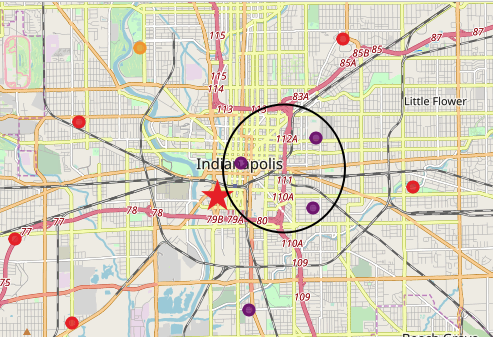

The red star on the map above indicates the approximate location of Lucas Oil Stadium. The three nearest neighborhoods are Downtown, Fountain Square, and Near Eastside - which are within the black circle above

In [136]:
#indy_venues.reset
indy_venues = indy_venues.rename(index={'West Indianapolis': 'Near Eastside'})

In [141]:
#Creates a df of the Downtown,Fountain Square, and Near Eastside neighborhoods
nearby_grouped_all = indy_venues[(indy_venues.index.isin(['Downtow','Fountain Square','Near Eastside']))]
#nearby_grouped_all.set_index("Neighborhood", inplace = True)
nearby_grouped_all.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Near Eastside,39.775092,-86.13216,Flat12 Bierwerks,39.772757,-86.138504,Brewery
Near Eastside,39.775092,-86.13216,The Smoking Goose Dorman Street Meatery,39.772685,-86.138384,Food
Near Eastside,39.775092,-86.13216,La Parada Restaurant,39.771392,-86.130890,Mexican Restaurant
Near Eastside,39.775092,-86.13216,King Dough,39.773868,-86.137349,Pizza Place
Near Eastside,39.775092,-86.13216,Society of Salvage,39.773335,-86.139671,Antique Shop


**Now, lets create a df that contains only the breweries within those 3 neighborhoods**

In [142]:
breweries_df = nearby_grouped_all[(nearby_grouped_all['Venue Category'].isin(['Brewery']))]

In [143]:
breweries_df

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Near Eastside,39.775092,-86.132160,Flat12 Bierwerks,39.772757,-86.138504,Brewery
Near Eastside,39.775092,-86.132160,Ash & Elm Cider Co,39.767869,-86.125255,Brewery
Near Eastside,39.775092,-86.132160,Sun King Brewery,39.769116,-86.144946,Brewery
Near Eastside,39.775092,-86.132160,Indiana City Brewing Co,39.766130,-86.141270,Brewery
Near Eastside,39.775092,-86.132160,St Joseph Brewery & Public House,39.774969,-86.145639,Brewery
Near Eastside,39.775092,-86.132160,Centerpoint Brewing,39.782138,-86.137135,Brewery
Near Eastside,39.775092,-86.132160,outliers brewing company,39.775179,-86.147450,Brewery
Downtow,39.768400,-86.157875,Rock Bottom Restaurant & Brewery,39.767377,-86.158554,Brewery
Fountain Square,39.756585,-86.133249,Fountain Square Brewing Company,39.749546,-86.140346,Brewery


### Discussion Points
1. Based on the results, if the family moved their brewery near Lucas Oil Stadium, the brewery location would most likely fall into Cluster 3. The three closest neighborhoods, which are Near Eastside, Downtown, and Fountain Square, turn out to have breweries as quite a common venue. There are at least 14 breweries in those neighborhoods combined. There might be more if I increased the radius of influence when pulling info from Foursquare API. Measuring the distance on google maps, this puts at least 14 breweries within a 3 mile radius of Lucas Oil Stadium. 

2. While there are a lot of breweries existing near the stadium, there is at least 1 venue that falls in the brewery category in the Downtown neighborhood – which is Rock Bottom Restaurant and Brewery. Thus, if the family does decide to move the brewery near Lucas Oil Stadium, moving it to the Downtown neighborhood would be the best option give the locations of surrounding competition.  
